# Not Tokenized

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
datasets = pd.read_csv('customer_complaints_1.csv')

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(datasets['text'])

In [4]:
k = 3 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(datasets['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [5]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
for ind in order_centroids[i, :10]:
     print(' %s' % terms[ind])
     print()


Top terms per cluster:
Cluster 0:
Cluster 1:
Cluster 2:
 rude

 on

 to

 day

 my

 service

 was

 rep

 with

 me



In [6]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.8421052631578947


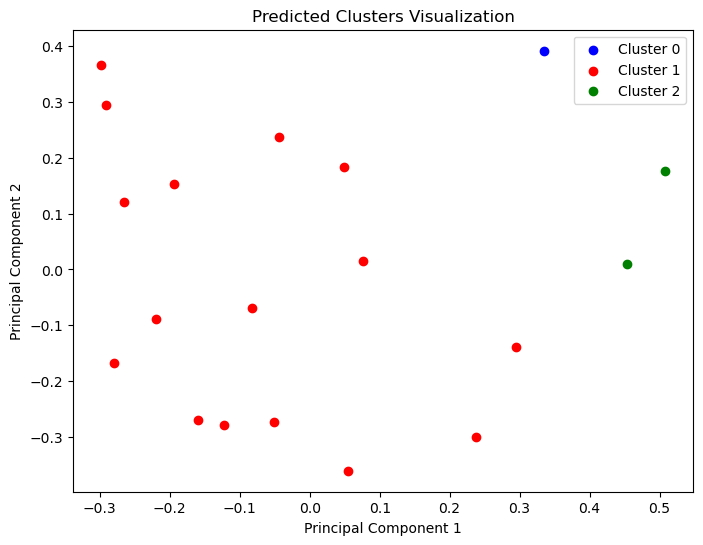

In [7]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Tokenize

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [9]:
datasets = pd.read_csv('customer_complaints_1.csv')
dataset=datasets['text']

In [10]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords

In [11]:
stop_words = stopwords.words('english')
stemmer = nltk.SnowballStemmer("english")

In [12]:
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text

In [13]:
datasets['text_clean'] = datasets['text'].apply(preprocess)
datasets.head(20)

,author,posted_on,rating,text,text_clean
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,use love comcast constant updat internet cabl ...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,im comcast worst internet provid im take onlin...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,could give negat star star review would never ...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,ive worst experi far sinc instal noth problem...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,check contract sign comcast advertis offer mat...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,thank god chang dish gave awesom price super p...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,long time custom xfiniti isp local walmart nov...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,malfunct dvr manag prevent us ad record custom...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,charg overwhelm comcast servic rep ignor rude ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",cabl dish uvers etc past eh know comcast take ...


In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(datasets['text_clean'])

In [15]:
k = 2 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
datasets, y_pred

(                          author      posted_on  rating  \
 0    Alantae of Chesterfeild, MI  Nov. 22, 2016       1   
 1       Vera of Philadelphia, PA  Nov. 19, 2016       1   
 2    Sarah of Rancho Cordova, CA  Nov. 17, 2016       1   
 3       Dennis of Manchester, NH  Nov. 16, 2016       1   
 4           Ryan of Bellevue, WA  Nov. 14, 2016       1   
 5            Terri of Mobile, AL   Nov. 9, 2016       1   
 6   Kellie of Salt Lake City, UT   Nov. 9, 2016       1   
 7      Kathleen of New Haven, CT   Nov. 6, 2016       2   
 8        Shira of Bloomfield, NJ   Nov. 5, 2016       1   
 9       Kristy of Alpharetta, GA   Nov. 2, 2016       1   
 10           Melissa of Katy, TX   Nov. 1, 2016       1   
 11        Lori of Huntsville, AL   Nov. 1, 2016       1   
 12     Richard of Lauderhill, FL  Oct. 31, 2016       1   
 13       Liz of Eden Prairie, MN  Oct. 31, 2016       1   
 14          Meta of Thornton, CO  Oct. 30, 2016       1   
 15           Emma of Medford, MA  Oct. 

In [17]:

# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(datasets['text_clean'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [18]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
for ind in order_centroids[i, :10]:
     print(' %s' % terms[ind])
     print()


Top terms per cluster:
Cluster 0:
Cluster 1:
 internet

 servic

 would

 custom

 speed

 comcast

 call

 get

 xfiniti

 tech



In [19]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.6842105263157895


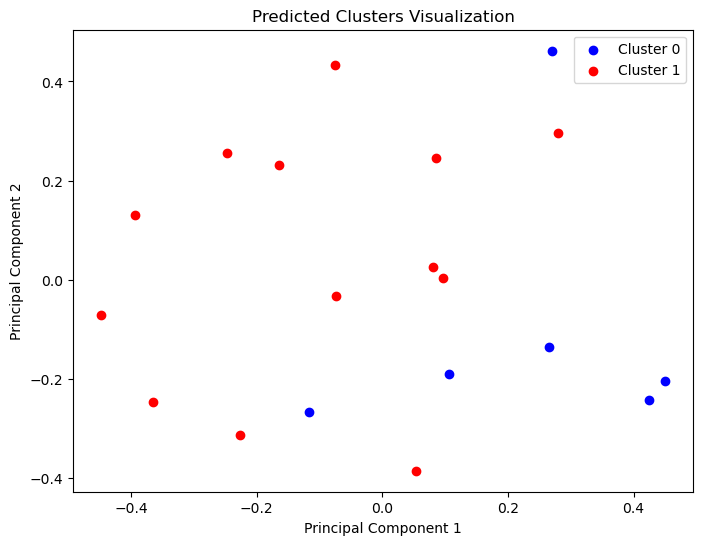

In [20]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# CLuestering using document

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

In [22]:
tokenized_dataset = [doc.split() for doc in dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100,
window=5, min_count=1, workers=4)

In [23]:
X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in
word2vec_model.wv], axis=0) for doc in dataset])

In [24]:
k = 2 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)
# Predict the clusters for each document
y_pred = km.predict(X)
# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            0
I enjoy hiking and camping in the mountains                        0
I like to read books and watch movies                              1
I prefer playing video games over sports                           0
I love listening to music and going to concerts                    1


In [25]:

# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Purity: 0.6
